In [108]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Setting up matplotlib to display inline plots
%matplotlib inline
sns.set(style="whitegrid")

In [110]:
# load the dataset
file_path = "C:/Users/ThinkPad/Desktop/Python/Portofolio Projects/IT Online/Project 1 - Exploratory Data Analysis (EDA) on Sales Data/Global_Superstore.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [112]:
# Check the shape of the DataFrame (rows, columns)
df.shape

(1000, 24)

In [114]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000 non-null   ob

In [116]:
# Generate descriptive statistics for numerical columns
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,1000.000000,194.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,25079.328000,53966.170103,1710.971470,5.55800,0.092840,288.920440,272.384897
std,12897.726632,33734.306466,1259.239238,2.71846,0.148666,574.504782,176.160716
min,58.000000,2920.000000,1.910000,1.00000,0.000000,-3059.820000,1.070000
25%,15118.750000,19134.000000,826.907500,4.00000,0.000000,10.037500,209.827500
50%,25084.500000,60564.000000,1585.115000,5.00000,0.000000,190.685000,258.897500
75%,34524.000000,88187.500000,2477.812500,7.00000,0.150000,518.872500,351.070250
max,51284.000000,98198.000000,9892.740000,14.00000,0.800000,4946.370000,923.630000


In [118]:
# Check for missing values
df.isnull().sum()


Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64

In [120]:
# Handling missing data
df.dropna(inplace=True)


In [122]:
# Convert 'Order Date' and Shipping Date' columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Double-check the data types to ensure dates are correctly formatted
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 996
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          194 non-null    int64         
 1   Order ID        194 non-null    object        
 2   Order Date      194 non-null    datetime64[ns]
 3   Ship Date       194 non-null    datetime64[ns]
 4   Ship Mode       194 non-null    object        
 5   Customer ID     194 non-null    object        
 6   Customer Name   194 non-null    object        
 7   Segment         194 non-null    object        
 8   Postal Code     194 non-null    float64       
 9   City            194 non-null    object        
 10  State           194 non-null    object        
 11  Country         194 non-null    object        
 12  Region          194 non-null    object        
 13  Market          194 non-null    object        
 14  Product ID      194 non-null    object        
 15  Category   

In [124]:
# Calcultate total sales and profit
total_sales = df ['Sales'].sum()
total_profit = df['Profit'].sum()

print(f"Total Sales: {total_sales}")
print(f"Total Profit: {total_profit}")



Total Sales: 54535.08
Total Profit: 12063.97


In [126]:
# Identify top-selling products
top_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_selling_products

Product Name
GBC Ibimaster 500 Manual ProClick Binding System           9892.74
GBC DocuBind P400 Electric Binding System                  4355.17
Canon Image Class D660 Copier                              2999.95
GBC DocuBind 300 Electric Binding Machine                  2419.51
Hon 5100 Series Wood Tables                                2036.86
Bady BDG101FRU Card Printer                                1439.98
Avaya IP Phone 1140E VoIP phone                            1394.95
Global Adaptabilites Bookcase, Cherry/Storm Gray Finish    1292.94
Tennsco Single-Tier Lockers                                1126.02
Ibico Ibimaster 300 Manual Binding System                  1103.97
Name: Sales, dtype: float64

In [128]:
# Analyze sales by region
sales_by_region = df.groupby('Region')['Sales'].sum()
sales_by_region


Region
Central US     17187.94
Eastern US     12256.44
Southern US     8360.75
Western US     16729.95
Name: Sales, dtype: float64

In [130]:
# Examine the relationship between sales and profit
sales_profit_correlation = df['Sales'].corr(df['Profit'])
print(f"Correlation between Sales and Profit: {sales_profit_correlation}")


Correlation between Sales and Profit: 0.9313979948257132


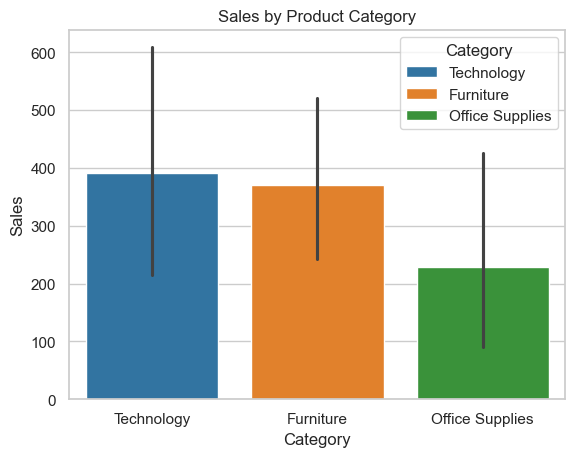

In [132]:
# Bar plot of sales by product category
sns.barplot(x='Category', y='Sales', hue='Category', data=df, palette=['#1f77b4', '#ff7f0e', '#2ca02c'], legend=True)
plt.title('Sales by Product Category')
plt.show()

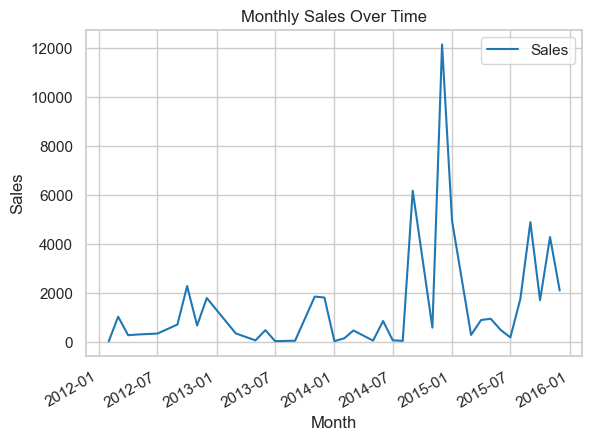

In [134]:
# Create a new column for year-month for better time-series analysis
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Aggregate sales by year-month
monthly_sales = df.groupby('Year-Month')['Sales'].sum()

#Ensure the index is in datetime format for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

# Line plot - Monthly Sales Over Time
monthly_sales.plot(kind='line', color='#1f77b4', legend=True)
plt.title('Monthly Sales Over Time')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

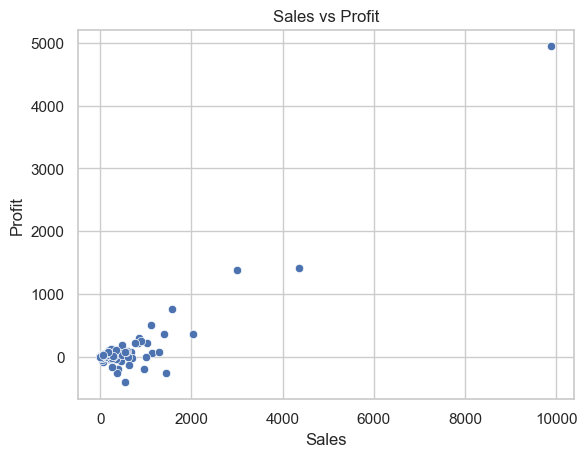

In [136]:
# Scatter plot between Sales and Profit
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

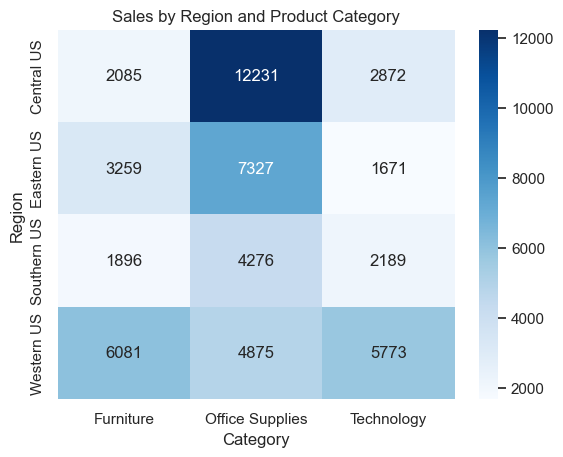

In [138]:
# Pivot table for Sales by Region and Product Category
region_category_sales = df.pivot_table(index='Region', columns='Category', values='Sales', aggfunc='sum')

# Heatmap of Sales by Region and Product Category
sns.heatmap(region_category_sales, annot=True, fmt='.0f', cmap='Blues')
plt.title('Sales by Region and Product Category')
plt.show()


Based on our analysis and visualizations, here are some key insights:

1. Top-selling products: The dataset reveals that a few specific products drive a significant portion of sales, particularly in the Technology and Office Supplies categories.
2. Regional sales variations: Sales are highest in certain regions like Western US and Eastern US, while regions like Africa and Oceania contribute less to overall sales.
3. Relationship between sales and profit: While higher sales typically lead to higher profits, there are certain products or transactions where this relationship is not as strong, possibly due to discounts or product costs.
4. Sales trends over time: Sales show a steady increase during specific months, suggesting potential seasonality, especially during the last quarter of the year.
5. Category-wise sales distribution: Technology is the highest-grossing category in terms of total sales, followed by Furniture and Office Supplies.

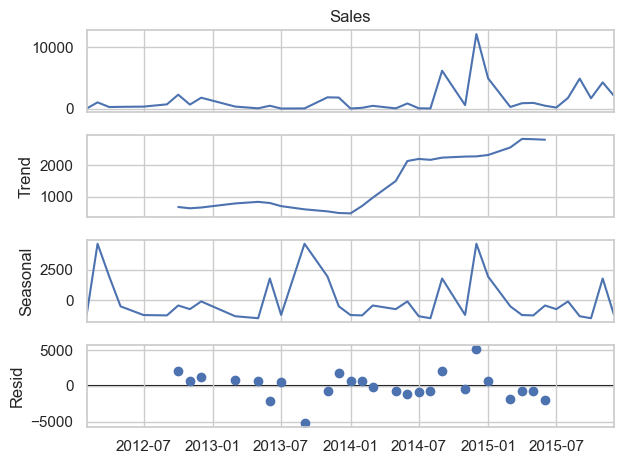

In [145]:
# Decompose the time series to identify trends and seasonality
decomposition = sm.tsa.seasonal_decompose(monthly_sales, model='additive', period=12)

# plot the decomposed components
decomposition.plot()
plt.show()





# __Summary Report of Exploratory Data Analysis on GlobalMart Sales Data__

The exploratory data analysis (EDA) of GlobalMart’s sales data provided several insights into the company's performance across different regions, product categories, and time periods. The dataset included key information on sales, profit, customer segments, and geographical regions, which were analyzed to derive actionable insights.

## __Key Findings__
### __1. Most Profitable Product Categories__
The Technology category was the most profitable product segment, generating the highest sales and profit, followed by Office Supplies and Furniture. Technology products consistently outperformed others, both in terms of revenue and profitability. This suggests a high demand for technology items, making it a key growth driver for the company. On the other hand, although Furniture generated substantial revenue, its profit margins were lower, indicating potentially higher costs or more discounts in that category.

### __2. Sales Trends Over Time__
Sales trends indicated seasonality, with noticeable spikes in certain months, particularly toward the end of the year. These peaks likely correspond to holiday shopping periods, such as the fourth quarter. A line graph of monthly sales over time showed consistent increases during these months, suggesting that GlobalMart experiences strong sales during the holiday season. The company should ensure adequate inventory during these high-demand periods and develop targeted marketing strategies to maximize sales.

### __3. Regional Sales and Profit Variation__
There were significant differences in sales and profit performance across regions. Western US and Eastern US were the top-performing regions, contributing the most to overall sales. In contrast, regions like Africa and Oceania had relatively lower sales volumes. However, despite lower sales, certain underperforming regions may have growth potential with targeted marketing and product selection strategies. Additionally, the company should consider strategies to boost sales in regions with lower performance, such as increasing brand awareness or optimizing logistics.

### __4. Correlation Between Discount and Profit__
An analysis of the relationship between discounts and profits revealed a negative correlation. While discounts can increase sales volume, they often reduce profit margins significantly. In some cases, high discounts even resulted in losses. A scatter plot of sales vs. profit highlighted that large discounts tend to drive down profits. This suggests that GlobalMart should reassess its discounting strategy, ensuring that discounts are applied carefully to prevent profit erosion. Implementing a data-driven discounting policy may help maintain profitability while boosting sales.

## __Recommendations__
Based on the findings, several recommendations can be made:

__1. Focus on Technology:__ Since Technology is the most profitable category, GlobalMart should continue to expand its product offerings and marketing efforts in this segment.

__2. Prepare for Seasonal Demand:__ The company should optimize inventory levels and promotional activities in preparation for peak sales periods, particularly during the holiday season.

__3. Regional Strategy:__ More targeted strategies should be implemented in underperforming regions, including localized marketing campaigns, expansion of product lines, and logistical improvements to increase sales.

__4. Optimize Discount Strategy:__ To preserve profit margins, GlobalMart should evaluate its current discount policies and limit the use of large discounts that negatively impact profitability.

By leveraging these insights, GlobalMart can improve its sales performance and make more informed business decisions moving forward.